<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/NACA_2412_Airfoil_Lift_and_Drag_Calculation_using_Panel_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

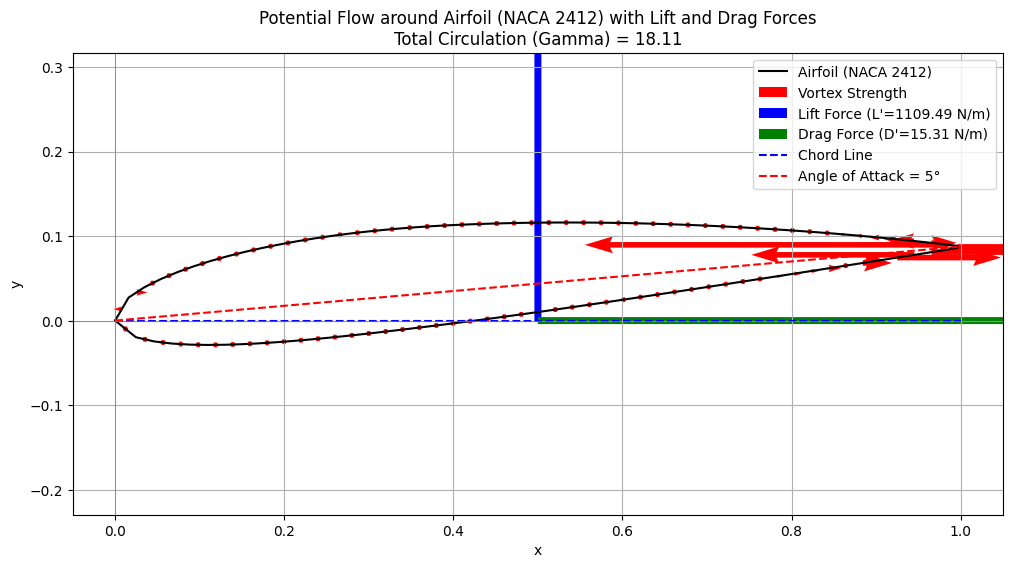

Positive angle of attack 5°:
Lift per unit length: 1109.4948322110315 N/m
Drag per unit length: 15.3125 N/m
Total circulation (Gamma): 18.11420134222092


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the geometry of a NACA 2412 airfoil
def naca2412(x):
    m = 0.02  # Maximum camber
    p = 0.4   # Location of maximum camber
    t = 0.12  # Maximum thickness
    yt = 5 * t * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x**2 + 0.2843 * x**3 - 0.1015 * x**4)

    yc = np.where(x < p, m/p**2 * (2*p*x - x**2), m/(1-p)**2 * ((1 - 2*p) + 2*p*x - x**2))
    dyc_dx = np.where(x < p, 2*m/p**2 * (p - x), 2*m/(1-p)**2 * (p - x))
    theta = np.arctan(dyc_dx)

    xu = x - yt * np.sin(theta)
    yu = yc + yt * np.cos(theta)
    xl = x + yt * np.sin(theta)
    yl = yc - yt * np.cos(theta)

    return xu, yu, xl, yl

# Define the rotation matrix for angle of attack
def rotate(x, y, angle):
    radians = np.deg2rad(angle)
    x_rot = x * np.cos(radians) - y * np.sin(radians)
    y_rot = x * np.sin(radians) + y * np.cos(radians)
    return x_rot, y_rot

# Discretize the airfoil surface into panels and rotate for angle of attack
def define_panels(N, angle):
    x = np.linspace(0, 1, N)
    xu, yu, xl, yl = naca2412(x)
    x = np.concatenate([xu, xl[::-1]])
    y = np.concatenate([yu, yl[::-1]])
    x, y = rotate(x, y, angle)
    return x, y

# Solve for potential flow using panel method
def panel_method(x, y):
    N = len(x) - 1  # Number of panels
    xc = (x[:-1] + x[1:]) / 2  # Control points
    yc = (y[:-1] + y[1:]) / 2

    A = np.zeros((N, N))
    b = -2 * np.pi * np.ones(N)

    for i in range(N):
        for j in range(N):
            if i == j:
                A[i, j] = 0.5
            else:
                dx = xc[i] - x[j]
                dy = yc[i] - y[j]
                A[i, j] = (1 / (2 * np.pi)) * (dx / (dx**2 + dy**2))

    gamma = np.linalg.solve(A, b)

    return xc, yc, gamma

# Calculate lift and drag forces
def calculate_forces(gamma, rho, V_inf):
    # Calculate total circulation
    Gamma = np.sum(gamma)

    # Kutta-Joukowski theorem for lift per unit length
    L_per_length = rho * V_inf * Gamma

    # Estimate drag using a drag coefficient (simplified model)
    C_d = 0.01  # Assumed drag coefficient for the example
    D_per_length = 0.5 * rho * V_inf**2 * C_d

    return L_per_length, D_per_length, Gamma

# Plot the airfoil and flow
def plot_airfoil_flow(x, y, xc, yc, gamma, L_per_length, D_per_length, angle, Gamma):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, 'k-', label='Airfoil (NACA 2412)')
    plt.quiver(xc, yc, gamma, np.zeros_like(gamma), scale=50, color='r', label='Vortex Strength')

    # Add lift and drag vectors
    plt.quiver(0.5, 0, 0, L_per_length, angles='xy', scale_units='xy', scale=1, color='b', label=f'Lift Force (L\'={L_per_length:.2f} N/m)')
    plt.quiver(0.5, 0, D_per_length, 0, angles='xy', scale_units='xy', scale=1, color='g', label=f'Drag Force (D\'={D_per_length:.2f} N/m)')

    # Plot the chord line to show angle of attack
    plt.plot([0, 1], [0, 0], 'b--', label='Chord Line')
    x_chord, y_chord = rotate(np.array([0, 1]), np.array([0, 0]), angle)
    plt.plot(x_chord, y_chord, 'r--', label=f'Angle of Attack = {angle}°')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Potential Flow around Airfoil (NACA 2412) with Lift and Drag Forces\nTotal Circulation (Gamma) = {Gamma:.2f}')
    plt.legend()
    plt.grid()
    plt.axis('equal')
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.show()

# Main function to run the notebook steps
def main():
    N = 50  # Number of panels
    angle_of_attack_positive = 5  # Positive angle of attack in degrees

    # Positive angle of attack
    x, y = define_panels(N, angle_of_attack_positive)
    xc, yc, gamma = panel_method(x, y)
    rho = 1.225  # Density of air in kg/m^3
    V_inf = 50  # Freestream velocity in m/s
    L_per_length, D_per_length, Gamma = calculate_forces(gamma, rho, V_inf)
    plot_airfoil_flow(x, y, xc, yc, gamma, L_per_length, D_per_length, angle_of_attack_positive, Gamma)

    print(f'Positive angle of attack {angle_of_attack_positive}°:')
    print(f'Lift per unit length: {L_per_length} N/m')
    print(f'Drag per unit length: {D_per_length} N/m')
    print(f'Total circulation (Gamma): {Gamma}')

if __name__ == "__main__":
    main()


\section*{Short Description}
This notebook demonstrates the calculation of lift and drag forces on a NACA 2412 airfoil at a specified angle of attack using the panel method. The potential flow around the airfoil is solved using linear algebra to determine the circulation, which is then used to calculate the aerodynamic forces.

\section*{Equations Solved}
\subsection*{Potential Flow Equation}
\[
\sum_{j=1}^{N} \gamma_j \left( \frac{1}{2\pi} \ln \left( \frac{r_{ij}^2}{r_{ii}^2} \right) \right) = -2\pi \quad \text{for} \quad i \ne j
\]
Where \(\gamma_j\) is the circulation strength of the \(j\)-th panel and \(r_{ij}\) is the distance between control points of the \(i\)-th and \(j\)-th panels.

\subsection*{Kutta-Joukowski Lift Theorem}
\[
L' = \rho V_\infty \Gamma
\]
Where \(L'\) is the lift force per unit length, \(\rho\) is the air density, \(V_\infty\) is the freestream velocity, and \(\Gamma\) is the total circulation.

\subsection*{Drag Force Estimation}
\[
D' = \frac{1}{2} \rho V_\infty^2 C_d
\]
Where \(D'\) is the drag force per unit length and \(C_d\) is the drag coefficient.

\section*{Method Used}
\subsection*{Panel Method}
Discretizes the airfoil surface into a series of linear panels. Each panel is represented by a vortex sheet with a constant strength, and the potential flow is computed by solving a system of linear equations derived from boundary conditions and the Biot-Savart law.

\subsection*{Steps Included}
\begin{enumerate}
    \item Define the geometry of the NACA 2412 airfoil.
    \item Apply the angle of attack by rotating the airfoil.
    \item Discretize the airfoil into panels and solve for the circulation strengths using linear algebra.
    \item Calculate lift and drag forces using the Kutta-Joukowski theorem and an empirical drag coefficient.
    \item Visualize the airfoil, flow characteristics, and aerodynamic forces.
\end{enumerate}
